What I am going to research is to discover the differences in between two airline companies. I will look between the Etihad Airways and American Airlines and to use the different programs and packages to find out who receives the most profit and what problems each airline has based off their individual reviews and rating systems. I will be either web crawling or extracting data from twitter to gather the data and then clean it. I will be using sentiment analysis for analyzing and comparing the reviews for each airline and I would like to discover what they believe will be the future for their company. I have flown with American Airlines many times and I am curious to find out what other people think or what their opinions are of these two airline companies. I would like to use topic modeling and network analytics and word cloud to figure out what topics are usually stated in reviews or comments and to discover who has the most connections and who provides the most comments of these airlines. I love to fly and this topic will be interesting for me because I love to travel and discover the new amenities and accessories that are provided between each airline and how they operate during the flight.

In [2]:
import requests
from lxml import html
import csv
import pandas as pd
 

In [3]:
r = requests.get('https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-Etihad-Airways')
data = html.fromstring(r.text)

title = data.xpath("//div/a/span[@class='noQuotes']/text()") 
print title

['A good experience on Air.', 'Very good airline', 'Lost Baggage and Wish to Forget Service', 'Incredible service', 'Worst/dumb ground staff', 'Pleasant Flight \\Experience', 'Good', 'Seamless', 'Too expensive this year to fly with them', 'business class on thad']


In [4]:
review = data.xpath("//div[@class='entry']/p/text()")
print review

['\nFlying with Etihad Airways is always pleasant. Service is always upto the standard. Staves are helpful and friendly. Only drawback is the wine serving in Economy class. Red wine is really below average, any wine drinkers can easily reject the red wine serving in Economy class. I have been travelling with 8 Etihad flights since September 2017 in London -Kozhikode...\n', '\nThe Flight was very good, the only issue we faced is the food that they provide. was limited and not too much option.\n', '\nMy wife travelled from Kochi to Dallas via Abu Dhabi (EY 281 -EY161 on 9th of March). Right from the check-in of baggage,nothing seemed welcoming. The lady who provided the boarding pass (2 am on March 9th for EY 281 in Kochi) showed all her pathetic attitude towards my wife. I thought these guys attend grooming and training sessions before...\n', '\nI took the long route back to New Zealand - a 35 hour trip in total. The airline staff is so professional, yet courteous, their service really 

In [5]:
a = "https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or"
b = "-Etihad-Airways#REVIEWS"
count = 1
for i in range(1,10):
    print a + b

https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or-Etihad-Airways#REVIEWS


In [6]:
a = "https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or"
b = "-Etihad-Airways#REVIEWS"
count = 1
for i in range(1,10):
    print '%s%s%s' %(a,count,b)
    count = count + 50  

https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or1-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or51-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or101-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or151-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or201-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or251-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or301-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or351-Etihad-Airways#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or401-Etihad-Airways#REVIEWS


In [7]:
Testdata = []
a = "https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or"
b = "-American-Airlines#REVIEWS"
count = 1

for i in range(1,10):
    url = '%s%s%s' %(a,count,b)
    count = count + 50   
    data = html.fromstring(requests.get(url).text)
    
    # Xpath
    title = data.xpath("//div/a/span[@class='noQuotes']/text()")  
    review = data.xpath("//div[@class='entry']/p/text()")           
    crawleddata = zip(title, review)
    for row in crawleddata:
        Testdata.append(row)

In [8]:
finaldata = pd.DataFrame(Testdata)
finaldata.to_csv("data/etihadairlines.csv", encoding= 'utf-8')

Now I have collected data from about 5 pages from Trip Advisor and I will save it under the csv file etihadairways.csv.

In [9]:
finaldata = []

a = "https://www.tripadvisor.com/Airline_Review-d8729074-Reviews-or"
b = "-Etihad-Airways#REVIEWS"
count = 1

for i in range(1,10):
    url = '%s%s%s' %(a,count,b)
    count = count + 50   
    data = html.fromstring(requests.get(url).text)
    
    # Xpath
    title = data.xpath("//div/a/span[@class='noQuotes']/text()")  
    review = data.xpath("//div[@class='entry']/p/text()")     

    crawleddata = zip(title, review)
    
    for row in crawleddata:
        finaldata.append(row)    

finaldata = pd.DataFrame(finaldata)       
finaldata.to_csv("data/etihad.csv", encoding="utf-8")

In [10]:
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
% matplotlib inline

# convert to string
tokens = str(review)

#lowecases
tokens = tokens.lower()

#tokenization
tokens = word_tokenize(tokens)

#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))

# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())

#remove short words
tokens = [ word for word in tokens if len(word) >= 2 ]

#Create your bigrams ... bigrams are two tokens
#bgs = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist_h = nltk.FreqDist(tokens)
fdist_h.most_common(40)

[('etihad', 7),
 ('seats', 6),
 ('flight', 6),
 ('good', 4),
 ('class', 4),
 ('get', 3),
 ('experience', 3),
 ('service', 3),
 ('also', 3),
 ('charged', 3),
 ('crew', 2),
 ('boarding', 2),
 ('food', 2),
 ('helpful', 2),
 ('seat', 2),
 ('even', 2),
 ('entertainment', 2),
 ('business', 2),
 ('great', 2),
 ('would', 2),
 ('could', 2),
 ('plane', 2),
 ('first', 2),
 ('one', 2),
 ('airlines', 2),
 ('excellent', 2),
 ('pressed', 2),
 ('breakfast', 2),
 ('several', 2),
 ('nice', 2),
 ('provided', 2),
 ('kept', 2),
 ('drinks', 2),
 ('clean', 2),
 ('came', 2),
 ('unfortunately', 1),
 ('selection', 1),
 ('welcomed', 1),
 ('money', 1),
 ('magnetic', 1)]

In [11]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [12]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
more_stopwords = set(('cant', 'aint', 'today'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'abhu': 1,
          'aboard': 1,
          'abu': 1,
          'accommodating': 1,
          'accompany': 1,
          'account': 1,
          'aircraft': 1,
          u'airline': 3,
          u'airway': 1,
          'also': 3,
          'annoyance': 1,
          u'attendant': 1,
          'attention': 1,
          'attentive': 1,
          u'award': 1,
          'away': 1,
          'baggage': 1,
          'best': 1,
          'better': 1,
          'boarding': 2,
          'boast': 1,
          'booking': 1,
          'breakfast': 2,
          'bring': 1,
          'brother': 1,
          'business': 2,
          'button': 1,
          'cabin': 1,
          'came': 2,
          'caring': 1,
          'chance': 1,
          'change': 1,
          'charged': 3,
          'cheap': 1,
          'checked': 1,
          'choose': 1,
          'chosen': 1,
          'class': 4,
          'clean': 2,
          'comfortable': 1,
          'cool': 1,
          'could': 2,
          

I have cleaned the data and will distribute the words in order from the most used to the least.

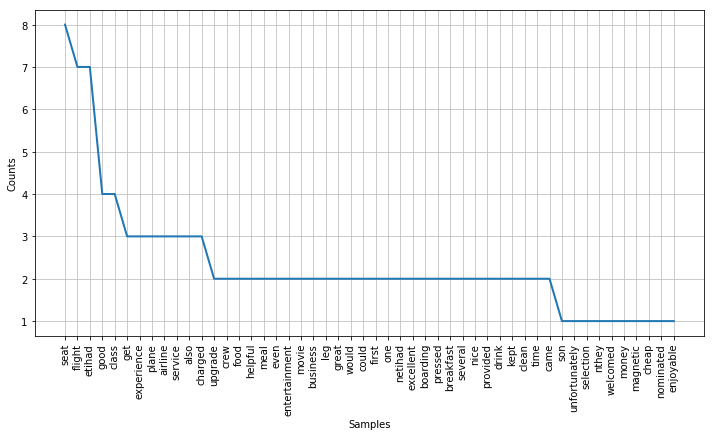

In [13]:
plt.figure(figsize=(12,6))
fdist.plot(50)

In the chart above many words have come up and it seems to be Seat, flight, etihad and good are the top most frequent words used.

In [14]:
freq_word = []

for k,v in fdist.items():
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

wordlist

,0,1
0,son,1
1,unfortunately,1
2,selection,1
3,nthey,1
4,welcomed,1
5,money,1
6,magnetic,1
7,cheap,1
8,nominated,1
9,enjoyable,1


In [15]:
wordlist = wordlist.rename(columns={0: 'word', 1: 'freq'})
wordlist

,word,freq
0,son,1
1,unfortunately,1
2,selection,1
3,nthey,1
4,welcomed,1
5,money,1
6,magnetic,1
7,cheap,1
8,nominated,1
9,enjoyable,1


(-0.5, 399.5, 199.5, -0.5)

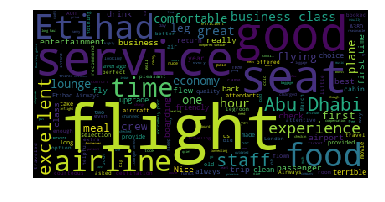

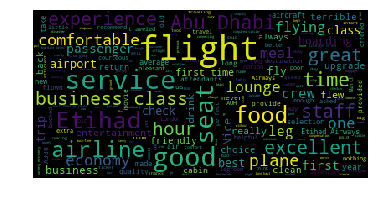

In [16]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text = open(path.join('data/etihad.csv')).read()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

In [21]:
openfile = open("data/etihadairlines.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()
print reviews [:1]

[['Good, comfortable service', '\r\nUsed AA miles to fly first class to/from Nicaragua for two weeks of warmth in February. As usual, American was a comfortable ride, in first (and in economy so long as I get an aisle seat). The airline flies to much of where I need/want to go, and prices are pretty reasonable.\r\nUnfortunately, their AA mileage rewards program has been...\r\n']]


In [22]:
#remove the extra bracket
reviews = [x for y in reviews for x in y]
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

2 0 2 Positive
4 1 3 Positive
1 0 1 Positive
1 3 -2 Negative
0 0 0 Neutral
1 2 -1 Negative
0 0 0 Neutral
2 2 0 Neutral
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
5 0 5 Positive
0 1 -1 Negative
2 1 1 Positive
0 1 -1 Negative
2 3 -1 Negative
1 0 1 Positive
1 3 -2 Negative
0 0 0 Neutral
6 1 5 Positive
0 1 -1 Negative
1 0 1 Positive
2 1 1 Positive
4 2 2 Positive
0 0 0 Neutral
2 0 2 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
2 3 -1 Negative
1 0 1 Positive
4 1 3 Positive
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
4 1 3 Positive
2 0 2 Positive
6 0 6 Positive
0 2 -2 Negative
4 2 2 Positive
1 0 1 Positive
3 3 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
6 0 6 Positive
0 1 -1 Negative
0 2 -2 Negative
1 0 1 Positive
3 2 1 Positive
0 0 0 Neutral
2 3 -1 Negative
0 1 -1 Negative
2 2 0 Neutral
0 1 -1 Negative
0 2 -2 Negative
1 0 1 Positive
6 0 6 Positive
0 0

In [23]:
positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

In [24]:
print len(positive_review), "positive"
print len(negative_review), "negative"
print len(neutral_review), "neutral"

78 positive
53 negative
49 neutral


In [19]:
import pandas as pd
import csv

from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning) 

In [20]:
texts = []
r = csv.reader(open('data/etihadairlines.csv', 'rb'))
for i in r:
    texts.append(i)  
len(texts)

90

In [21]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [22]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

numpy.random.seed(1)
for k in range(2,10):
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    print goodcm.get_coherence()

-22.339880527719473
-22.279008918651872
-22.126829895982873
-22.05987112600851
-22.03552248238147
-22.087698147296557
-22.050740384648368
-22.049049506618715


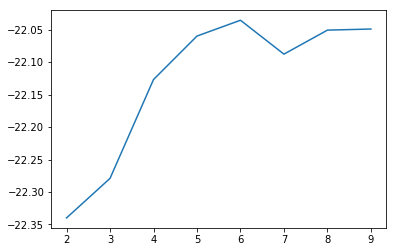

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

numpy.random.seed(1) 
k_range = range(2,10)
scores = []
for k in k_range:
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(goodcm.get_coherence())
    
plt.figure()
plt.plot(k_range, scores)

In [24]:
numpy.random.seed(1)
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2, passes=20)

In [25]:
model.show_topics()

[(0,
  u'0.009*"\r\nWe flew from Toronto to JFK to catch a connecting flight to Buenos Aires. We figured a 2 hour layover would be enough. Unfortunately boarding was delayed when a WestJet flight from Calgary deplaned a few passengers inside the US cleared zone. The terminal was shut down until they were found.\r\nThe flight was on an Embraer commuter jet. The...\r\n" + 0.009*"\r\nI have literally had it with American Airlines!! First let me say we usually fly AA because it is conveniently located 15 minutes from our home and that\'s about all the choices we have at DFW as AA rules there!! My husband travels a LOT for business and again we did an international trip over to China. The older ladies...\r\n" + 0.009*"Made our Connection" + 0.009*"\r\nOur flight to Savannah form Hartford on April 10th connecting through Charlotte was a bit nerve racking as we had to de-ice before take-off. This delayed us and made our already tight connection even tighter. Our party of three were the last t

In [26]:
for i in range(0,2):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])


We flew from Toronto to JFK to catch a connecting flight to Buenos Aires. We figured a 2 hour layover would be enough. Unfortunately boarding was delayed when a WestJet flight from Calgary deplaned a few passengers inside the US cleared zone. The terminal was shut down until they were found.
The flight was on an Embraer commuter jet. The...
, 
I have literally had it with American Airlines!! First let me say we usually fly AA because it is conveniently located 15 minutes from our home and that's about all the choices we have at DFW as AA rules there!! My husband travels a LOT for business and again we did an international trip over to China. The older ladies...
, Made our Connection, 
Our flight to Savannah form Hartford on April 10th connecting through Charlotte was a bit nerve racking as we had to de-ice before take-off. This delayed us and made our already tight connection even tighter. Our party of three were the last three to board the Savannah leg of the trip. The gate agent was

UnicodeEncodeError: 'ascii' codec can't encode character u'\u2019' in position 103: ordinal not in range(128)

Up above is the topics that are being talked about and this is where the main descriptions are of the airlines by the customers and what they experienced and what their opinions are about the airlines.

StoryTelling

What i have found is that the two airlines are pretty neck and neck with each other. They seem to have similar faults and similar pros with the good seating and great service and not a lot of layover time. Based on the data I would suggest that Etihad Airways seems to be the more popular airline. The reason is that Etihad received more positive reviews than American Airlines even though the difference was very minor. I personally suggest that both of them need to upgrade their technology a little and be more focused on the customers and how they treat them. In the data i was seeing that some people were complaining about abuse and the way that they were being treated was unfair. although I didnt see any remarks that pertained to an event similar to the one on United Airlines, there were still complaints on the other aspects. 

I believe that trying to find a way to eliminate layover time or layovers in general would satisfy the customers more and receive a better rating. Also with the equipment I would suggest creating or using material that is less expensive to import and so they could sell tickets for a cheaper price which would intail having more customers on board. 